<a href="https://colab.research.google.com/github/mychele-larson/Falls_Elderly/blob/main/Falls_Elderly_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
data_2019 = pd.read_csv('/content/drive/MyDrive/Data/fatal_2019_medical.csv')


In [24]:
data2019 = data_2019.drop(columns = {'Total.2', 'Average'})
data2019

,Total,Per Capita,Total.1,Average.1,Per Capita.1,Average.2,Per Capita.2
0,70,521,3.14 M,$17.99 M,"$34,528",$2.92 B,$5.60 M
1,71,661,3.08 M,$22.67 M,"$34,301",$3.57 B,$5.40 M
2,72,712,3.19 M,$24.51 M,"$34,418",$3.70 B,$5.20 M
3,73,617,2.33 M,$22.82 M,"$36,983",$3.09 B,$5.00 M
4,74,693,2.28 M,$25.11 M,"$36,228",$3.33 B,$4.80 M
5,75,758,2.20 M,$27.80 M,"$36,671",$3.49 B,$4.60 M
6,76,930,2.22 M,$35.41 M,"$38,077",$4.09 B,$4.40 M
7,77,928,1.91 M,$34.12 M,"$36,771",$3.90 B,$4.20 M
8,78,898,1.72 M,$34.24 M,"$38,132",$3.59 B,$4.00 M
9,79,"1,024",1.60 M,$39.95 M,"$39,014",$3.89 B,$3.80 M


In [61]:
modified_2019 = data2019.rename(columns={"Total": "Age", "Per Capita": 'Falls', 'Total.1': 'Total_Cost_M', 'Average.1': "Avg_Cost1_M", 'Per Capita.1': 'PC_1', 'Average.2': 'Avg_Cost2_B', 'Per Capita.2': 'PC_2_M' })
modified_2019

,Age,Falls,Total_Cost_M,Avg_Cost1_M,PC_1,Avg_Cost2_B,PC_2_M
0,70,521,3.14 M,$17.99 M,"$34,528",$2.92 B,$5.60 M
1,71,661,3.08 M,$22.67 M,"$34,301",$3.57 B,$5.40 M
2,72,712,3.19 M,$24.51 M,"$34,418",$3.70 B,$5.20 M
3,73,617,2.33 M,$22.82 M,"$36,983",$3.09 B,$5.00 M
4,74,693,2.28 M,$25.11 M,"$36,228",$3.33 B,$4.80 M
5,75,758,2.20 M,$27.80 M,"$36,671",$3.49 B,$4.60 M
6,76,930,2.22 M,$35.41 M,"$38,077",$4.09 B,$4.40 M
7,77,928,1.91 M,$34.12 M,"$36,771",$3.90 B,$4.20 M
8,78,898,1.72 M,$34.24 M,"$38,132",$3.59 B,$4.00 M
9,79,"1,024",1.60 M,$39.95 M,"$39,014",$3.89 B,$3.80 M


In [86]:
# Remove "M", "$" and "B" from each column
modified_2019['Total_Cost_M'] = pd.to_numeric(modified_2019['Total_Cost_M'].astype(str).str.replace("[\$, M]", "", regex=True))
modified_2019['Avg_Cost1_M'] = pd.to_numeric(modified_2019['Avg_Cost1_M'].astype(str).str.replace("[\$, M]","", regex=True))
modified_2019['PC_1']= pd.to_numeric(modified_2019['PC_1'].astype(str).str.replace("$", "").str.replace(",", "")).astype(int)
modified_2019['Avg_Cost2_B'] = pd.to_numeric(modified_2019['Avg_Cost2_B'].astype(str).str.replace("[\$, B]", "", regex=True))
modified_2019['PC_2_M'] = pd.to_numeric(modified_2019['PC_2_M'].astype(str).str.replace("[\$, M]", "", regex=True))
modified_2019

<ipython-input-86-fadba90b24d3>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  modified_2019['PC_1']= pd.to_numeric(modified_2019['PC_1'].astype(str).str.replace("$", "").str.replace(",", "")).astype(int)


,Age,Falls,Total_Cost_M,Avg_Cost1_M,PC_1,Avg_Cost2_B,PC_2_M
0,70,521,3.14,17.99,34528,2.92,5.60
1,71,661,3.08,22.67,34301,3.57,5.40
2,72,712,3.19,24.51,34418,3.70,5.20
3,73,617,2.33,22.82,36983,3.09,5.00
4,74,693,2.28,25.11,36228,3.33,4.80
5,75,758,2.20,27.80,36671,3.49,4.60
6,76,930,2.22,35.41,38077,4.09,4.40
7,77,928,1.91,34.12,36771,3.90,4.20
8,78,898,1.72,34.24,38132,3.59,4.00
9,79,"1,024",1.60,39.95,39014,3.89,3.80


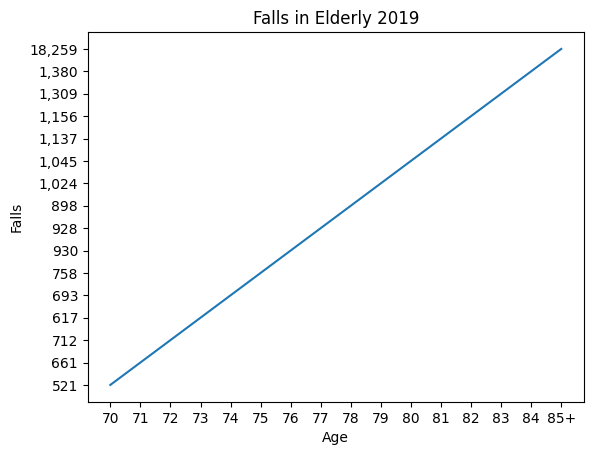

In [87]:
plt.plot(modified_2019['Age'], modified_2019['Falls'])
plt.xlabel('Age')
plt.ylabel('Falls')
plt.title('Falls in Elderly 2019')
plt.show()

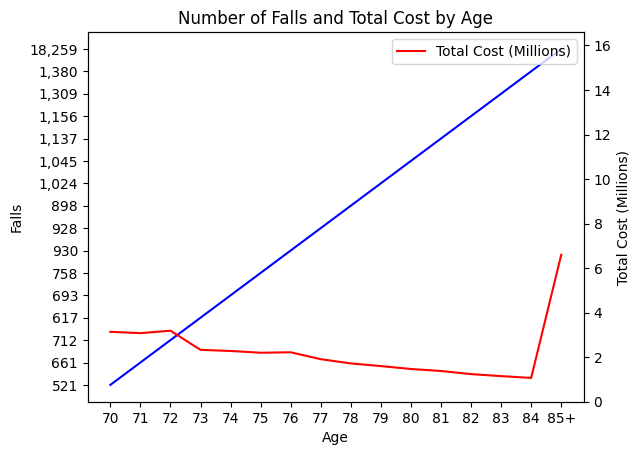

In [105]:
fig, ax = plt.subplots()

ax.plot('Age', 'Falls', data=modified_2019, color='blue', label='Falls')
ax.set_xlabel("Age")
ax.set_ylabel("Falls")

ax2= ax.twinx()
ax2.plot("Age", "Total_Cost_M", data=modified_2019, color='red', label="Total Cost (Millions)")
ax2.set_ylabel("Total Cost (Millions)")
ax2.set_ylim([0, max(modified_2019["Total_Cost_M"]) +10])

plt.title("Number of Falls and Total Cost by Age")
plt.legend()
plt.show()

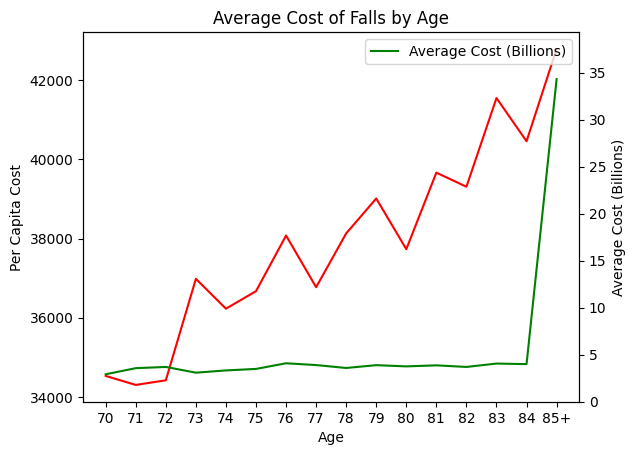

In [107]:
fig, ax = plt.subplots()

ax.plot('Age', 'PC_1', data=modified_2019, color='red', label='Per Capita Cost by Age')
ax.set_xlabel("Age")
ax.set_ylabel("Per Capita Cost")

ax2= ax.twinx()
ax2.plot("Age", "Avg_Cost2_B", data=modified_2019, color='green', label="Average Cost (Billions)")
ax2.set_ylabel("Average Cost (Billions)")
ax2.set_ylim([0, max(modified_2019["Avg_Cost2_B"]) +5])

plt.title("Average Cost of Falls by Age")
plt.legend()
plt.show()